## Object Detection

The problem of object detection involves recognizing the objects in a image and localizing where in the image the objects occur. This involves predicting a bounding box around every single object present in the image.
Object detection is a much harder problem than classification. Not only do we need to recognize multiple objects that may be present in a given image, we also have to precisely localize them. Note that the number of objects in each image is variable, and multiple different objects could be present in a single image.

So how do we solve the problem of object detection? 

Faster R-CNN or FRCNN was one of the seminal architectures that provided several key ideas that form the basis of object detection using deep convolutional neural networks. These ideas are still in use today, and have inspired several other object detection architectures. FRCNN still remains as a key milestone in the evolution of object detectors, and is often used as the benchmark to beat. We will study the key ideas in great detail in this section.

## Evolution of Object Detectors

Before we get into the exact details of FRCNN, let us briefly take a look at the evolution of object detectors which eventually culminated with the creation of FRCNN. 

Prior to the deep learning wave, the standard way to solve the Computer Vision problems like image classification, object detection, was to use standard Computer Vision based techniques that relied on handcrafting features, and using these features to solve the problem at hand. These feature extractors were typically a combination of edge detectors, color features, blob detection, Histogram of Gradients (HoG), SURF etc. The key problem was in designing these feature extractors. 

For example, let us say if we wanted to detect if humans are present in the image or not. We'd need to take into account the extensive variation in backgrounds, textures etc. And design feature extractors that focus on the humans, possibly using skin colour, texture and shapes. This involved tuning a lot of thresholds. Additionally, even if we ended up building a good feature extractor, the same features would not be useful to detect if cats are present in the image. So, there was a fundamental scale problem as well. Especially when dealing with 1000s of classes, it was impossible to handcraft features capable of distinguishing between the classes.

This is where Deep Learning changed the game. With the advent of Deep Convolutional Neural networks, the features were learnt by the deep neural network by looking at the data. There was no need for any hand crafting features or finetuning any thresholds. This approach was much more generic and scalable. This was reflected by significant improvements over State of the Art for almost all Computer Vision tasks. Deep CNNs have now become the de-facto method to solve vision tasks in todays world. 

Let us go back in time to the beginning of the Deep Learning revolution. AlexNet, the first successful Deep Convolutional Neural Network had just been published and was making huge waves in the computer vision community. It had significantly improved the State of the Art on the Imagenet classification challenge. 

A natural idea was to try and use Deep Networks to solve the object detection problem. There was a fundamental problem however. For object detection, each image had a variable number of objects present. For example, a single image could potentially have no cat, one cat, two cats, three cats or N cats, and we have to reliably detect each and every single cat correctly.

A naive idea would be to extract regions in the image such that these regions would only contain one single object, and then use our Deep Learning classifier to extract features. But the objects could be present anywhere in the image. Additionally different objects have different sizes. An elephant would probably occupy a much larger region in the image than a cat. 

### R-CNN
R-CNN was one of the first deep learning based works that attempted to solve this problem. It was an extension to the naive idea that we discussed before. 

The R-CNN approach had 3 modules
1. Selective Search
2. Feature Extraction
3. Classification

The biggest problem with the naive solution was in selecting regions that contain objects. R-CNN used to selective search to solve this problem. Selective search is a computer vision based algorithm that is capable of extracting candidate regions. We will not go into the exact details of selective search.

The steps to train R-CNN are as follows

1. Use selective search to generate ~2000 proposals per image.
2. Extract features for the region using a Deep Convolutional Neural Network: Deep neural networks typically take fixed size inputs, but regions can be of different sizes. To solve this problem, the region is always extracted and warped into the fixed size. 
3. Based on the ground truth bounding boxes, each region proposal is assigned either to be positive if it highly overlaps with the ground truth, or negative if it doesn't.
4. Using the ground truth assigment and the features extracted, we train class specific Support Vector Machines (SVMs) for classification. Additionally, bounding box regressors were trained to finetune the localization of the object within a proposal.

More details on R-CNN can be found at https://arxiv.org/pdf/1311.2524.pdf.

### Fast R-CNN

One of the biggest disadvantages of the R-CNN based approach, was that we had to extract features for every region proposal independently. So, if we generated 2000 proposals for a single image, we'd have to run 2000 forward passes to extract the region features. This is prohibitively expensive and extremely slow (both during training and inference)

Additionally, training is a multi-stage pipeline. We have Selective Search, the deep network, the SVMs on top of the features and the bounding box regressors. This is a cumbersome pipeline to train and inference.

To solve these problems, Fast R-CNN was an improvement over R-CNN, by the same authors. It significantly improved speeds. 9x faster than R-CNN during training and  213x  faster at test-time. Additionally, it also improved the mAP / quality of object detection.

There were 2 major contributions 

1. Region of Interest (RoI) Pooling
As mentioned, one of the fundamental issues with R-CNN was the need for multiple forward passes to extract the features for the region proposals of a single image. Instead, can we extract the features in one go? This was the problem that was solved using RoI Pooling. 

Faster R-CNN used the entire image as the input to the CNN instead of a single region proposal. Then, the RoIs (region proposal bounding boxes) were used on top of the CNN output to extract the region features in one pass. We will go into the exact details of RoI pooling as part of our Faster-RCNN breakdown.

2. Multi-task loss
Fast R-CNN got rid of the need for using SVMs. Instead, both classification and bounding box regression was done by the Deep Neural Network itself. Unlike R-CNN which only used Deep Networks for feature extraction, Fast R-CNN was more end to end. It was a single architecture for region proposal feature extraction, classification and regression.


So the high level algorithm is as follows
1. Use selective search to generate ~2000 region proposal/RoIs per image.
2. In a single pass of the Fast R-CNN
    1. Extract all the RoI features in one single pass using RoI pooling
    2. Classify and localize using the classification and regression heads
    

Since the feature extraction for all the region proposals is happening in one pass, this approach is significantly faster than R-CNN where each single proposal needed a separate forward pass.

Additionally, since the neural network is trained end to end i.e asked to do classification and regression, there is also an improvement in the accuracy of object detection.
 
We will go more into the details of RoI pooling and the loss formuation when we study Faster R-CNN. More details on Fast R-CNN can be found at https://arxiv.org/pdf/1504.08083.pdf

### Faster R-CNN

Why settle for fast when we can be faster? Fast R-CNN was significantly faster than R-CNN. However, it still needed selective search to be run in order to obtain region proposals. The selective search algorithm can only be run on CPUs. Additionally, the algorithm is slow and time consuming. Thus it became the bottleneck consuming most of the time.

Is there any way to get rid of selective search? Well, the obvious idea to consider is to use Deep Networks in order to generate region proposals. This was the core idea of FRCNN. Faster R-CNN eliminates the need for selective search and lets a deep network learn the region proposals. It was one of the first real near time object detectors. 

Additionally, since we are using a deep network to learn the region proposals, the region proposals are also better. So the resulting accuracy of the overall architecture is also much better.


We can thus view FRCNN as consisting of 2 core modules
1. Region Proposal Network (RPN): This the the module that is responsible for generating the region proposals. RPNs are designed to efficiently predict region proposals with a wide range of scales and aspect ratios.

2. R-CNN module: This is the same as Fast R-CNN. It receives a bunch of region proposals, performs ROI pooling, followed by classification and regression.


Another important thing to note is that both the RPN and the R-CNN module share the same convolutional layers i.e the weights are shared rather than learning two separate networks. 

Let us now study the architecture in greater detail. The details of the paper can be found at https://arxiv.org/pdf/1506.01497.pdf

### Convolutional Backbone

In the original implementation, FRCNN used the conv layers of the VGG-16 as the convolutional backbone for both the RPN and the R-CNN modules. There is one minor modification. The last pooling layer after conv5 is removed. 

As we've studied in VGG architectures earlier, VGG reduces the spatial size of the feature map by 2 in every conv block via maxpooling. Since the last pooling layer is removed, the spatial size is reduced by a factor of $2^4$ i.e 16.

So a 224x224 image is reduced to a 14x14 sized feature map at the output.

In [1]:
import cv2
import torch
import torchvision

from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
vgg11 = torchvision.models.vgg11()

# Let us only get the convolutional layers of the VGG architectures. 
conv_layers = vgg11.features

# We also need to get rid of the last max pool layer. 
frcnn_fe = torch.nn.Sequential(*conv_layers[:-1])

In [4]:
x = torch.rand([1, 3, 224, 224])
y = frcnn_fe(x)
assert y.shape == torch.Size([1, 512, 14, 14])

### Region Proposal Network (RPN)

The Region Proposal Network takes in the image as input and outputs a set of region proposals that potentially contain objects as output. The idea is to replace the slow, and time consuming selective search with a deep neural network that is capable of producing region proposals / RoIs.

A key point to note is that the RPN operates on top of the convolutional feature map. With the VGG backbone, an input image of size (h, w) is scaled down to (h/16, w/16). So each 16x16 spatial region in the input image is reduced to a single point on the convolutional feature map. Thus each point in the output convolutional feature map represents a 16x16 patch in the input image. The RPN operates on top of this feature map.  

Another subtle point to remember is that each point in the convolutional feature map is chosen to correspond to a 16x16 patch, but it has a significantly larger receptive field (228x228 for VGG). The embedding at each point in the feature map is thus in effect the digest of a large receptive field. 

### Anchors

In order to predict the region proposals, FRCNN introduced the notion of anchors. Anchors now are ubiquitious in all object detectors. We will understand the intuition and the idea behind anchors now. 

One key aspect of the object detection problem is the variety in object sizes and shapes. Objects can range from very small (cats) to very large (elephants). Additionally, objects can have different aspect ratios. Some objects may be wide, some maybe tall etc. 

A naive solution is to have a single neural network detector head that is capable of identifying and recognizing all these objects of varying sizes and shapes. As one can imagine, this would make the job of this neural network detector extremely complex. 

A simpler solution is to have a wide variety of neural network detector heads, each responsible for solving a much simpler problem. For example, one head will only focus on large, tall objects, and will only fire when such objects are present in the image. The other heads will focus on other sizes/ aspect ratios. Thus, we can think of each head as responisble for doing a single, but simple job. This type of setup greatly aids and benefits learning. 

This was the intuition behind the introduction of anchors. We can think of anchors as reference boxes of varying shapes and sizes. All the proposals are made relative to anchors. Each individual anchor is uniquely characterized by its size and aspect ratio and is tasked with detecting similar shaped objects in the image. And we have multiple anchors, spanning multiple sizes and aspect ratios.

The original FRCNN architecture supported 9 anchor configurations, spanning 3 sizes and 3 aspect ratios, thus supporting a wide variety of shapes. These correspond to anchor boxes of scales (8, 16, 32) and aspect ratios of (0.5, 1.0, and 2.0) respectively.

In [5]:
def generate_anchors_at_grid_point(ctr_x, ctr_y, subsample, scales, aspect_ratios):
    """
    Generate anchor boxes of various sizes and aspect ratios centered at (ctr_x, ctr_y).
    The bounding boxes will be in (xtl, ytl, xbr, ybr) format 
    where (xtl, ytl) represents the coordinates of the top left corner 
          (xbr, ybr) represents the coordinates of the bottom right corner 
    """
    anchors = torch.zeros((len(aspect_ratios) * len(scales), 4), dtype=torch.float)
    
    for i, scale in enumerate(scales):
        for j, aspect_ratio in enumerate(aspect_ratios):
            # Generate the height and width with scale = scales[i] and aspect ratio = aspect_ratios[j]
            w = subsample * scale * torch.sqrt(aspect_ratio)
            h = subsample * scale * torch.sqrt(1 / aspect_ratio)
            
            # Given the height and width, let us generate the bounding box centered around (ctr_x, ctr_y)
            # with width w, and height h
            xtl = ctr_x - w / 2
            ytl = ctr_y - h / 2
            xbr = ctr_x + w / 2
            ybr = ctr_y + h / 2
            
            index = i * len(aspect_ratios) + j
            anchors[index] = torch.tensor([xtl, ytl, xbr, ybr])
    return anchors

In [6]:
scales = torch.tensor([8, 16, 32], dtype=torch.float)
aspect_ratios = torch.tensor([0.5, 1, 2])
subsample = 16

base_anchors = generate_anchors_at_grid_point(8, 8, subsample, scales, aspect_ratios)

print(f"Anchors are \n{base_anchors}")


# Let us examine the scale of the anchors
areas = torchvision.ops.box_area(base_anchors)

# All anchor boxes of the same scale should have the same area. 
for i, idx in enumerate(range(0, base_anchors.shape[0], 3)):
    # Assert that all bounding boxes are of the same scale
    expected_scale = scales[i] * subsample
    expected_area = expected_scale ** 2
    assert torch.allclose(areas[idx:idx+3], torch.tensor([expected_area]*3))
    
heights = base_anchors[:, 3] - base_anchors[:, 1]
widths = base_anchors[:, 2] - base_anchors[:, 0]
anchor_aspect_ratios = widths / heights

# All anchor boxes of the same aspect ratio
for i in range(3):
    expected_aspect_ratio = aspect_ratios[i]
    assert torch.allclose(anchor_aspect_ratios[i::3], torch.tensor([expected_aspect_ratio]*3)) 

Anchors are 
tensor([[ -37.2548,  -82.5097,   53.2548,   98.5097],
        [ -56.0000,  -56.0000,   72.0000,   72.0000],
        [ -82.5097,  -37.2548,   98.5097,   53.2548],
        [ -82.5097, -173.0193,   98.5097,  189.0193],
        [-120.0000, -120.0000,  136.0000,  136.0000],
        [-173.0193,  -82.5097,  189.0193,   98.5097],
        [-173.0193, -354.0387,  189.0193,  370.0387],
        [-248.0000, -248.0000,  264.0000,  264.0000],
        [-354.0387, -173.0193,  370.0387,  189.0193]])


What do negative values for bounding box co-ordinates mean? These are anchor boxes, parts of which lie outside the boundaries of the image. We will subsequently take a look at how such boxes are handled.

### Generating anchors aross the entire image

We have understood the idea behind anchors. But how do we know where to generate anchors in the input image? The objects of interest can be located anywhere in the entire image. How do we ensure that there are anchors covering these objects?

The idea is to replicate these anchors extensively across a grid of points in the input image. That way, we are covering the entire image with anchors. Assuming that we have chosen our anchor configurations correctly, this also guarantees the existence of anchors that exactly/almost cover the individual objects present in the image. These will be the anchors responsible for creating the proposal for object.

Note that we will be operating on the feature map and not directly on the input image. Each point in the feature map respresents a 16x16 region in the input image. Note that the embedding at every point of the feature map is the digest of the much larger receptive field. The correspondence with the 16x16 region is enforced via losses. 

The algorithm is thus very simple. We simply generate anchor bounding boxes at every point in the convolutional feature map. The anchor boxes are centered at the center of the 16x16 region of the input image corresponding to the point in the convolutional feature map.

Let us say we are dealing with a 800x800 image. This will lead to a 50x50 convolutional feature map. And if we generate 9 anchors per location in the feature map, we will end up with 22500 anchors per image.

In [7]:
def generate_all_anchors(input_img_size, subsample, scales, aspect_ratios):
    """
    Method to generate all anchor boxes for a given image.
    
    Note that this isn't the most efficient way of generating anchors. We have written simple code to ease
    understanding.
    """
    _, h, w = input_img_size

    conv_feature_map_size = (h//subsample, w//subsample)

    all_anchors = []
      
    # Generate anchor boxes centered at every point in the conv feature map
    # Each point in the feature map corresponds to a 16x16 (subsample, subsample) region in the input. 
    # The anchor box is centered at the center of the 16x16 region
    
    
    ctr_x = torch.arange(subsample/2, conv_feature_map_size[1]*subsample+1, subsample)
    ctr_y = torch.arange(subsample/2, conv_feature_map_size[0]*subsample+1, subsample)
    
    for y in ctr_y:
        for x in ctr_x:
            all_anchors.append(generate_anchors_at_grid_point(x, y, subsample, scales, aspect_ratios))

    all_anchors = torch.cat(all_anchors)
    return all_anchors

In [8]:
input_img_size = (3, 800, 800)
c, height, width = input_img_size
scales = torch.tensor([8, 16, 32], dtype=torch.float)
aspect_ratios = torch.tensor([0.5, 1, 2])
subsample = 16

anchors = generate_all_anchors(input_img_size, subsample, scales, aspect_ratios)

In [9]:
# Number of anchors should be (800/16 * 800/16 * 3 * 3)
assert anchors.shape == torch.Size([(height//subsample)*(width//subsample)*3*3, 4])

### Visualizing anchors

Let us visualize the anchor locations, shapes and sizes.

In [10]:
def get_dummy_img(input_img_size):
    """
    Method to generate a dummy blank image
    """
    dummy_img = torch.zeros(input_img_size).numpy().transpose(1, 2, 0)
    cv2.imwrite("/tmp/test.png", dummy_img*255)
    return cv2.imread("/tmp/test.png")


def plot_img(img, title):
    """
    Method to plot an image
    """
    plt.figure(dpi=200) 
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.imshow(img)

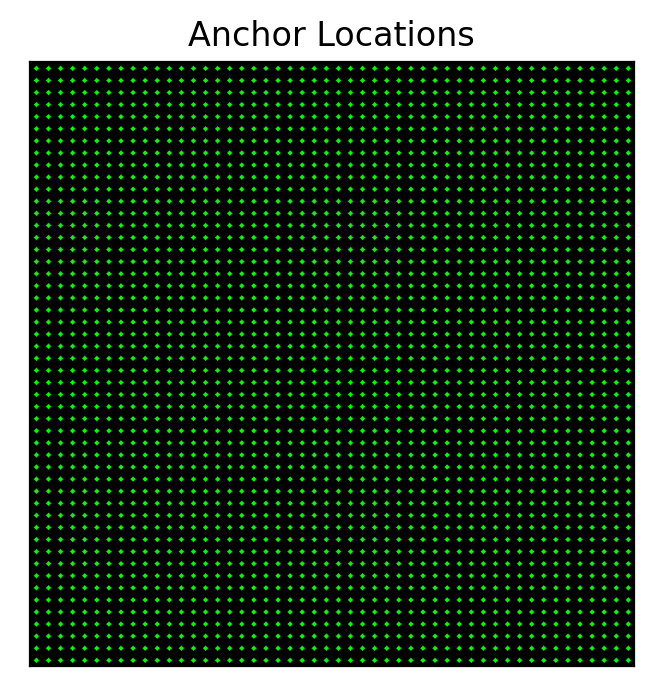

In [11]:
dummy_img = get_dummy_img(input_img_size)
conv_feature_map_size = (height//subsample, width//subsample)

ctr_x = torch.arange(subsample/2, conv_feature_map_size[1]*subsample+1, subsample)
ctr_y = torch.arange(subsample/2, conv_feature_map_size[0]*subsample+1, subsample)

for y in ctr_y:
    for x in ctr_x:
        cv2.circle(img=dummy_img, center = (int(x), int(y)), radius=1, color =(0,255,0), thickness=3)

plot_img(dummy_img, "Anchor Locations")

As we can see from the image above, we will be densely covering the entire image by generating anchors at each and every single grid location

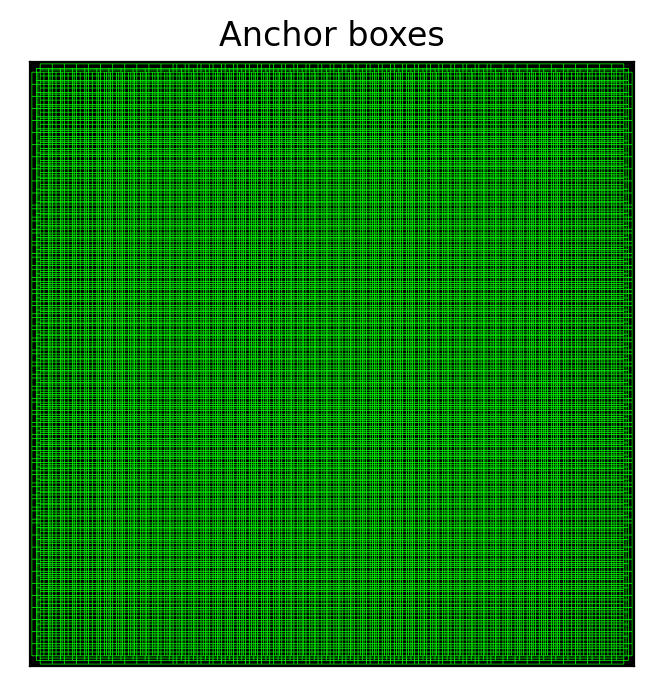

In [12]:
# Let us plot all anchors
dummy_img = get_dummy_img(input_img_size)

for bbox in anchors:
    xtl, ytl, xbr, ybr = bbox.int()
    if xtl >=0 and ytl >=0 and xbr <=width and ybr <=height:
        cv2.rectangle(dummy_img, (int(xtl), int(ytl)),  (int(xbr), int(ybr)), (0, 255,0), 1)

plot_img(dummy_img, "Anchor boxes")

As we can see, we generate an overwhelming number of anchors that cover the entire image.

25 25


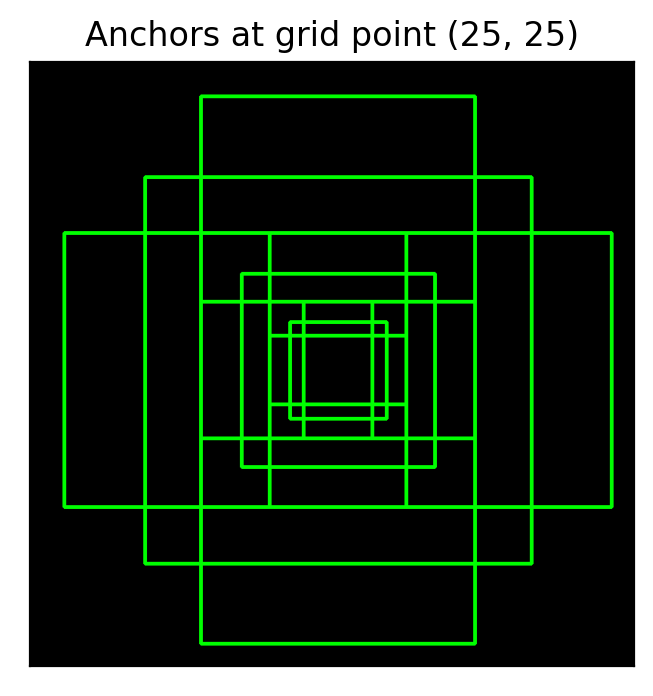

In [13]:
# Let us all anchors corresponding to central grid positions of the conv feature map
dummy_img = get_dummy_img(input_img_size)

ctr_y, ctr_x  = conv_feature_map_size[1] // 2, conv_feature_map_size[0] // 2
print(ctr_y, ctr_x)
anchor_start_idx = ctr_y * conv_feature_map_size[0] * 9 + ctr_x * 9
bboxes = anchors[anchor_start_idx:anchor_start_idx+9]
for bbox in bboxes:
    xtl, ytl, xbr, ybr = bbox.int()
    if xtl >=0 and ytl >=0 and xbr <=width and ybr <=height:
        cv2.rectangle(dummy_img, (int(xtl), int(ytl)),  (int(xbr), int(ybr)), (0, 255,0), 3)

plot_img(dummy_img, "Anchors at grid point (25, 25)")

To generate region proposals, a small network is convolved over the convolutional feature map output by the last shared convolutional layer. This small network takes as input an n × n spatial window of the input convolutional feature map. Each sliding window is mapped to a lower-dimensional feature, which is in-turn fed into a classifier (cls) and regressor (reg).

The classifier predicts objectness i.e a value from 0 to 1 where 1 indicates the presence of the object
The regressor predicts the region proposal relative to the anchor box. This architecture is naturally implemented with an n×n convolutional layer followed by two sibling 1x1 convolutional layers (for reg and cls), respectively. In the original implementation n is set to 3.

So we emit a classification and regression score for all anchors i.e at all points of the convolutional feature map at all scales and aspect ratios. Thus the reg layer has 4k outputs encoding the coordinates of k boxes, and the cls layer outputs 2k scores that estimate probability of object or not object for each proposal, where k=9 (3 scales * 3 aspect ratios)

Note that this network is comprised fully of only convolutional layers. Such an architecture is deemed as a **Fully Convolutional Network (FCN)** for short. Fully Convolutional Networks do not have an input size restriction. Because they consist of only convolution layers, they can work with arbitrary sized inputs. In the FCN, the combination of the nxn and 1x1 layers is equivalent to applying an Fully Connected layer over every embedding at each point in the convolutional feature map.

Also, because we are convolving a convolutional network on top of the feature map to generate the regression and classification scores, the convolutional weights are common / shared across different positions on the feature map. This makes the approach translation invariant. A cat in the top of the image vs a cat in the bottom of the image will be picked up at by the same anchor configuration (scale, aspect_ratio), if they are similarly sized. 

In [14]:
class RPN_FCN(nn.Module):
    """
    Implements the Fully Convolutional Network of the RPN
    """
    def __init__(self, k, in_channels=512):
        super(RPN_FCN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True))
        self.cls = nn.Conv2d(512, 2*k, kernel_size=1)
        self.reg = nn.Conv2d(512, 4*k, kernel_size=1)
        
    def forward(self, x):
        """
        x is the output of the backbone i.e a convolutional feature map of size
        (batch_size, in_channels, h, w)
        
        Output: 
        rpn_cls_scores: (batch_size, num_anchors, 2) tensor representing the classification score for each anchor box
        rpn_loc: (batch_size, num_anchors, 4) tensor representing the box coordinates relative to the anchor box
        """
        out = self.conv(x)
        rpn_cls_scores = self.cls(out).view(x.shape[0], -1, 2)# Convert (batch_size, h, w, 2k) to (batch_size, h*w*k, 2)
        rpn_loc = self.reg(out).view(x.shape[0], -1, 4)# Convert (batch_size, h, w, 4k) to (batch_size, h*w*k, 4)
        return rpn_cls_scores, rpn_loc

In [15]:
# in_channels is 512 because the output of the VGG 16 backbone has 512 features
# k=9
k = len(scales) * len(aspect_ratios)
rpn_fcn = RPN_FCN(k=k, in_channels=512)

# If we pass a (3, 800, 800) image through the conv backbone, 
# we will get a (512, 50, 50) convolutional feature map, which we pass to the RPN_FCN
x = torch.rand([1, 512, 50, 50])

rpn_cls_scores, rpn_loc = rpn_fcn(x)

# We have k anchors per point in the convolutional feature map
num_anchors = 50 * 50 * k 

assert num_anchors == anchors.shape[0]

assert rpn_cls_scores.shape == torch.Size([1, num_anchors, 2])

assert rpn_loc.shape == torch.Size([1, num_anchors, 4])

assert rpn_loc.squeeze().shape == anchors.shape

In [16]:
# FPNs can handle variable sized inputs

x1 = torch.rand([1, 512, 50, 50])
rpn_cls_scores_1, rpn_loc_1 = rpn_fcn(x1)
print(f"x1 {x1.shape} rpn_cls_scores.shape {rpn_cls_scores_1.shape} rpn_loc.shape  {rpn_loc_1.shape}")

x2 = torch.rand([1, 512, 20, 20])
rpn_cls_scores_2, rpn_loc_2 = rpn_fcn(x2)
print(f"x2 {x2.shape} rpn_cls_scores.shape {rpn_cls_scores_2.shape} rpn_loc.shape  {rpn_loc_2.shape}")

# Note that the FCN is able to handle multiple sized inputs and return multiple size outputs. Contrast this with the other 
# neural network architectures that we have learnt in the past which handled only a single sized input.



x1 torch.Size([1, 512, 50, 50]) rpn_cls_scores.shape torch.Size([1, 22500, 2]) rpn_loc.shape  torch.Size([1, 22500, 4])
x2 torch.Size([1, 512, 20, 20]) rpn_cls_scores.shape torch.Size([1, 3600, 2]) rpn_loc.shape  torch.Size([1, 3600, 4])


### Generating ground truth for RPN

So far we have generated a large number of anchor bounding boxes, and a neural network that is capable of generating the classification and regression offsets for every anchor.

Now we need to take a look at the objects present inside the image and assign it to relevant anchors that contain the object. The idea is as follows: Out of the thousands of anchors, **only the anchors that contain most of the object should try predicting and localizing the object.** We saw earlier that the intuition behind creating anchors was to ensure that each individual anchor is responsible for one particular type of object (shape, aspect_ratio). Thus it makes sense that only anchors that contain the object are responsible for classifying it.

#### Intersection over Union (IoU)

In order to measure whether the object lies within the anchor, we rely on Intersection over Union / IoU scores.

IoU between two bounding boxes is defined as **Area of overlap / Area of union**. So if the 2 bounding boxes are very similar, their overlap will be high, and their union will be close to the overlap resulting in a high IoU. If the 2 bounding boxes are varied, then their area of overlap will be minimal, resulting in a low IoU. 


FRCNN provided some guidelines to assign labels to the anchor boxes

1. We assign a positive label (1/ object present) to two kind of anchors 
    1.  The anchor/anchors with the highest Intersection-over-Union(IoU) overlap with a ground-truth-box.

    2.  An anchor that has an IoU overlap higher than 0.7 with ground-truth box.

2.  We assign a negative label (0 / no object/ background) to a non-positive anchor if its IoU ratio is lower than 0.3 for all ground-truth boxes. 

3.  Anchors that are neither positive nor negative do not contribute to the training objective.

Note that a single ground-truth object may assign positive labels to multiple anchors. Also, any anchor box that lies partially outside the image is ignored.

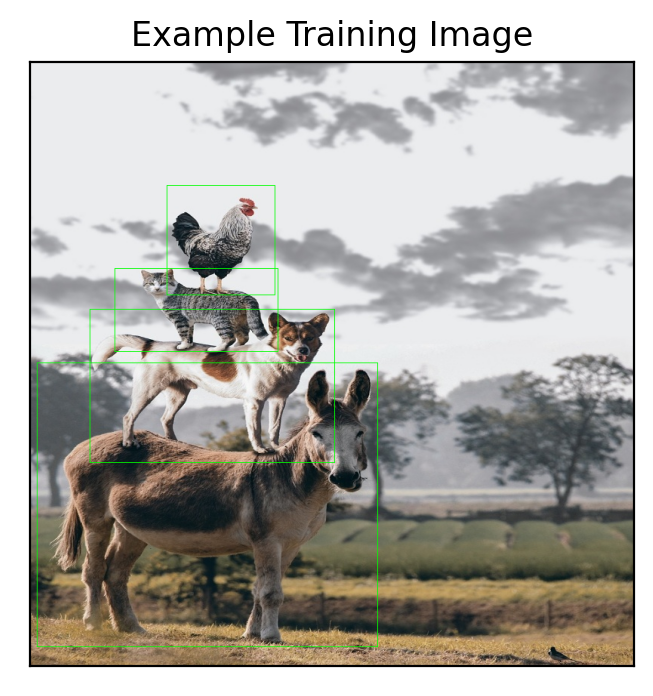

In [17]:
# For the purposes of demo, let us look at this totally realistic image along with the 
# ground truth and see how anchor assignment is done
img = cv2.imread("Figures/animals_resized.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
gt_bboxes = torch.tensor([[181., 163., 324., 308.],
        [112., 273., 328., 383.],
        [ 79., 327., 403., 530.],
        [  9., 398., 460., 774.]], dtype=torch.float)

gt_labels = torch.tensor([1, 2, 3, 4])

# We have an image with 4 classes. Let us look at the image and its annotations

img_clone = img.copy()
for gt_bbox in gt_bboxes:
    xtl, ytl, xbr, ybr = gt_bbox
    cv2.rectangle(img_clone, (int(xtl), int(ytl)),  (int(xbr), int(ybr)), (0, 255,0), 1)

plot_img(img_clone, "Example Training Image")

As we can see, we have an extremely realistic image with 4 animals/ classes and their corresponding bounding boxes. We note that these animals are of varying shapes and sizes and are clearly posing for the camera.

Another thing to note is that the class labels start at 1 and not 0. This is because 0 is reserved by FRCNN to represent background/ no object.

Now let us look at how we assign ground truth bboxes to anchors.

In [18]:
# Step 1: Let us keep track of valid anchors i.e anchors which lie completely inside the image
valid_indices = torch.where(
    (anchors[:, 0] >=0) & (anchors[:, 1] >=0) & (anchors[:, 2] <=width) & (anchors[:, 3] <=height))[0]

# Let us keep track of the label for each of the valid anchors. 
# We initialize it with -1 i.e not any class
rpn_valid_labels = -1 * torch.ones_like(valid_indices, dtype=torch.int)

# Let us obtain the valid anchor boxes
valid_anchor_bboxes = anchors[valid_indices]

# We will compute the IoU between the ground truth bounding boxes and the anchors
ious = torchvision.ops.box_iou(gt_bboxes, valid_anchor_bboxes)

# ious is an (n,m) tensor where n=num_gt_bboxes, and m=num_valid_anchor_bboxes
assert ious.shape == torch.Size([gt_bboxes.shape[0], valid_anchor_bboxes.shape[0]])

# Find the highest IOU for every GT bounding box
gt_ious_max = torch.max(ious, dim=1)[0]

# Find all the indices where the IOU = highest GT IOU
gt_ious_argmax = torch.where(gt_ious_max.unsqueeze(1).repeat(1, ious.shape[1]) == ious)[1]


# Highest IoU for every anchor box
anchor_ious_argmax = torch.argmax(ious, dim=0)
anchor_ious = ious[anchor_ious_argmax, torch.arange(len(anchor_ious_argmax))]

pos_iou_threshold  = 0.7
neg_iou_threshold = 0.3

# Negative anchor when IoU < 0.3 across all GT
rpn_valid_labels[anchor_ious < neg_iou_threshold] = 0  # 0 is the special no object/ background class

# Positive anchor when IoU > 0.7 
rpn_valid_labels[anchor_ious > pos_iou_threshold] = 1 # 1 is objectness

# For every GT bounding box, assign anchor with highest IoU as a positive anchor
rpn_valid_labels[gt_ious_argmax] = 1

Number of positive anchors 24


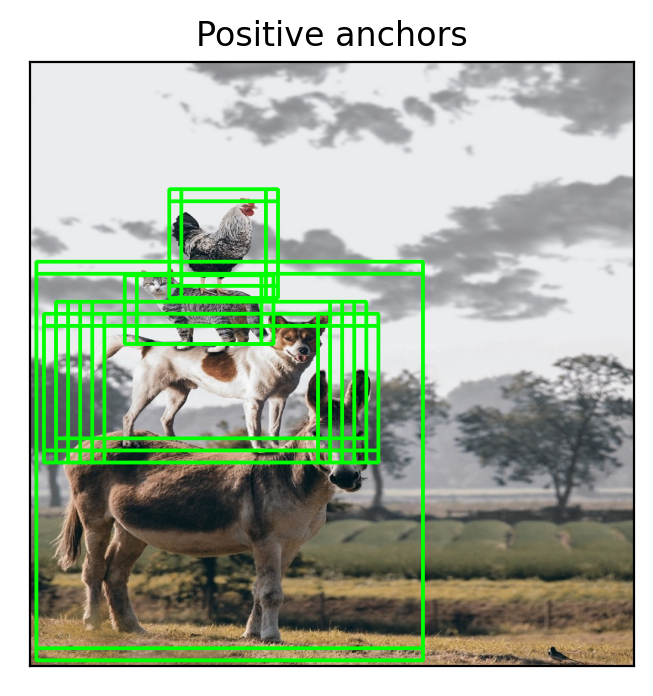

In [19]:
# Let us visualize some of the positive anchors
positive_anchor_idxes = torch.where(rpn_valid_labels == 1)[0]

positive_anchor_bboxes = valid_anchor_bboxes[positive_anchor_idxes] 
print(f"Number of positive anchors {len(positive_anchor_bboxes)}")

img_clone = img.copy()
for bbox in positive_anchor_bboxes:
    xtl, ytl, xbr, ybr = bbox
    cv2.rectangle(img_clone, (int(xtl), int(ytl)),  (int(xbr), int(ybr)), (0, 255,0), 3)

plot_img(img_clone, "Positive anchors")

Number of negative anchors 7439


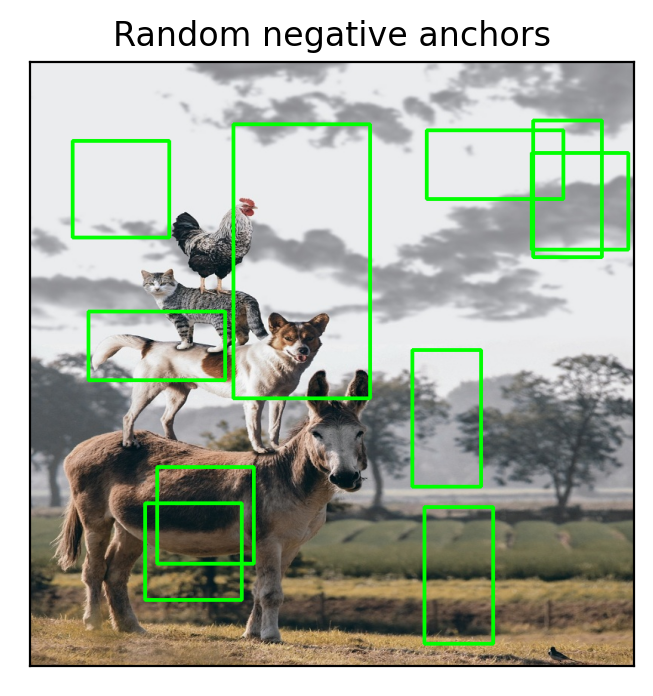

In [20]:
# Let us visualize some of the negative anchors
negative_anchor_idxes = torch.where(rpn_valid_labels == 0)[0]

negative_anchor_bboxes = valid_anchor_bboxes[negative_anchor_idxes] 
print(f"Number of negative anchors {len(negative_anchor_bboxes)}")


# We will only plot 10 random negative anchors for clarity

img_clone = img.copy()
for bbox in negative_anchor_bboxes[torch.randint(len(negative_anchor_bboxes), (10,))]:
    xtl, ytl, xbr, ybr = bbox
    cv2.rectangle(img_clone, (int(xtl), int(ytl)),  (int(xbr), int(ybr)), (0, 255,0), 3)

plot_img(img_clone, "Random negative anchors")

### Dealing with imbalance

Given our strategy of assigning labels to anchors, we notice that the number of negative anchors are significantly more than the number of positive anchors. For example, for the example image, we obtained only 24 positive anchors as opposed to 7439 negative anchors.

If we train directly on such an imbalanced dataset, the neural networks typically can learn a local minima by classifying every anchor to be a negative anchor.  In our example, if we predict every anchor to be a negative anchor, our resulting accuracy would be 7439 / (7439+22) i.e 99.7%. However the resulting neural network is practically useless because it has not learnt anything.

In other words imbalance will lead to bias towards the dominant class.

To deal with imbalance, there are typically 3 strategies
1. Undersampling: Sample less of the dominant class
2. Oversampling: Sample more of the less dominant class
3. Weighted Loss: Set the cost for misclassifying less dominant classes much more than the dominant class.

FRCNN utilizes the idea of undersampling. The exact strategy is outlined below:

For a single image, there are multiple positive and negative anchors. From these thousands of anchors, we randomly sample 256 anchors in an image to compute the loss function, where the sampled positive and negative anchors have a ratio of up to 1:1.  If there are fewer than 128 positive samples in an image, we pad the mini-batch with negative ones.

In [21]:
pos_ratio = 0.5
n_samples = 256

n_pos = int(pos_ratio * n_samples)
pos_idxes = torch.where(rpn_valid_labels == 1)[0]

if len(pos_idxes) > n_pos:
    # Set extra indices to -1 i.e not sample
    num_to_discard = len(pos_idxes)- n_pos
    discard_indices = pos_idxes[torch.randperm(len(pos_idxes))[:num_to_discard]]
    assert torch.all(rpn_valid_labels[discard_indices] == 1)
    rpn_valid_labels[discard_indices] = -1 
    
# Number of negatives = 128 + (padding in case there are < 128 positive examples)
n_neg = int(n_samples * (1-pos_ratio) + n_pos - len(pos_idxes))
neg_idxes = torch.where(rpn_valid_labels == 0)[0]

if len(neg_idxes) > n_neg:
    # Set extra indices to -1 i.e not sample
    num_to_discard = len(neg_idxes) - n_neg
    discard_indices = neg_idxes[torch.randperm(len(neg_idxes))[:num_to_discard]]
    assert torch.all(rpn_valid_labels[discard_indices] == 0)
    rpn_valid_labels[discard_indices] = -1

In [22]:
pos_idxes = torch.where(rpn_valid_labels == 1)[0]
neg_idxes = torch.where(rpn_valid_labels == 0)[0]

assert len(pos_idxes) + len(neg_idxes) == n_samples

#### Assigning targets to anchor boxes

We have taken a look at how we sample and assign labels to anchors. The next question to answer is how to come up with the regression targets? 

There are 3 cases
1. Case 1: label = -1, i.e unsampled / invalid anchor - These do not contribute to the training objective. So regression targets do not matter.

2. Case 2: label = 0, i.e background anchor - These anchors do not contain any object. So they also should not contribute to regression

3. Case 3: label = 1, i.e positive anchor - These anchors contain a object. We need to generate regression targets for these anchors.


Let us now consider only the case of positive anchors. The key intuition here is that **the anchors already contain majority of the object**. Otherwise they wouldn't have become positive anchors. So there is already significant overlap between the anchor and the object in question. Therefore it makes sense for us to learn the offset from the anchor bounding box to the object bounding box. The regressor is tasked with learning this offset i.e what delta we must make to the anchor bounding box in order for it to become the object bounding box. 


FRCNN adopts the following parameterization:
$$t_{x} = (x - x_{a})/w_{a}$$
$$t_{y} = (y - y_{a})/h_{a}$$
$$t_{w} = log(w/ w_a)$$
$$t_{h} = log(h/ h_a)$$

where $x$, $y$, $w$, and $h$ denote the ground truth bounding box’s center coordinates and its width and height
and $x_a$, $y_a$, $w_a$, and $h_a$ denote the anchor bounding box’s center coordinates and its width and height


$t_x$, $t_y$, $t_w$ and $t_h$ are the regression targets. So the regressor is in effect learning to predict the delta between the anchor bounding box and the ground truth bounding box.

In [23]:
def transform_bboxes(bboxes):
    """
    Converts bboxes from (xtl, ytl, xbr, ybr) format to (x, y, w, h) format
    
    Input: 
    bboxes: (n, 4) tensor in (xtl, ytl, xbr, ybr) format
    
    Output
    (n, 4 tensor) in (x, y, w, h) format
    """
    
    height = bboxes[:, 3] - bboxes[:, 1]
    width = bboxes[:, 2] - bboxes[:, 0]
    x_ctr = bboxes[:, 0] + width / 2
    y_ctr = bboxes[:, 1] +  height /2
    return torch.stack([x_ctr, y_ctr, width, height], dim=1)

def get_regression_targets(roi_bboxes, gt_bboxes):
    """
    Returns regression targets from roi_bboxes to gt_bboxes.
    
    Input:
    roi_bboxes: (n, 4) tensor representing the bounding boxes for region of interest / anchor 
    gt_bboxes: (n, 4) tensor representing the bounding boxes for ground truth
    
    Output:
    (n, 4) tensor containing the regression targets
    """
    assert roi_bboxes.shape == gt_bboxes.shape
    roi_bboxes_t = transform_bboxes(roi_bboxes)
    gt_bboxes_t = transform_bboxes(gt_bboxes)
    tx = (gt_bboxes_t[:, 0] - roi_bboxes_t[:, 0]) / roi_bboxes_t[:, 2]
    ty = (gt_bboxes_t[:, 1] - roi_bboxes_t[:, 1]) / roi_bboxes_t[:, 3]
    tw = torch.log(gt_bboxes_t[:, 2] / roi_bboxes_t[:, 2])
    th = torch.log(gt_bboxes_t[:, 3] / roi_bboxes_t[:, 3])
    return  torch.stack([tx, ty, tw, th], dim=1)

In [24]:
# Remember that we have already computed the ious between all the ground truth and anchor bboxes
# And we already know the GT bbox with the highest IOU for every anchor.
# Shape: [num_anchors, 4]
max_iou_gt_bbox_per_anchor = gt_bboxes[anchor_ious_argmax]

assert max_iou_gt_bbox_per_anchor.shape == torch.Size([valid_anchor_bboxes.shape[0], 4])

# For efficiency, we will generate regression targets for all the anchors. We can always filter out the label = -1, 0 
# cases using labels tensor later

rpn_valid_loc_targets = get_regression_targets(valid_anchor_bboxes, max_iou_gt_bbox_per_anchor)

assert rpn_valid_loc_targets.shape == valid_anchor_bboxes.shape

print(rpn_valid_loc_targets)

tensor([[ 0.8204,  1.9832, -0.2358,  0.4713],
        [ 0.7320,  1.9832, -0.2358,  0.4713],
        [ 0.6436,  1.9832, -0.2358,  0.4713],
        ...,
        [-2.2732, -5.6182, -0.2358,  0.4713],
        [-2.3616, -5.6182, -0.2358,  0.4713],
        [-2.4500, -5.6182, -0.2358,  0.4713]])


In [25]:
# We have obtained the labels and targets for valid anchors.
# Now let us obtain the overall labels and anchors

# The labels for invalid anchors will be -1
rpn_labels = -1 * torch.ones((anchors.shape[0]), dtype=torch.int)
rpn_labels[valid_indices] = rpn_valid_labels

# Similarly the targets for the invalid anchors will be 0
rpn_loc_targets = torch.zeros_like(anchors)
rpn_loc_targets[valid_indices] = rpn_valid_loc_targets

### RPN Loss Function

We have defined the RPN fully convolutional network and also how we can generate labels and regression targets for the outputs of the RPN FCN. Now we need to study the loss function that enables us to train the RPN.

As one would naturally expect, there are 2 loss terms
1. Classification Loss: Classification loss applies to both the positive and negative anchors. We will use the standard cross entropy loss that is used in any standard classifier.

2. Regression Loss: The regression loss applies **only** to the positive anchors. Here we use smooth L1 loss.
Smooth L1 loss is defined as $$ L_{1;smooth} = \begin{cases}
        0.5 (x_n - y_n)^2 / beta, & \text{if } |x_n - y_n| < beta \\
        |x_n - y_n| - 0.5 * beta, & \text{otherwise }
        \end{cases} $$ 
        
We can think of smooth L1 loss as a combination of L1 and L2 loss. If the value is < beta, it behaves like a L2 loss (Mean Squared Error). Otherwise it behaves like a L1 loss. In case of FRCNN, beta is set to 1.  

The intuition behind this is simple. 

If we used pure L2 loss i.e mean squared error, then higher loss terms contribute to exponentially loss. This is is because of the quadratic nature of the loss. Thus can lead to a bias where loss can be reduced by just focusing on the high value items. 

Instead if we use pure L1 loss, the higher loss terms still contribute more loss, but the effect is linear as opposed to quadratic. This still has a slightly worse bias towards higher loss terms.

By using L2 loss when the loss values are small, and the L1 loss when the loss values are large, we get the best of both worlds. When the loss value is small, because we are using L2 loss, its contribution will be exponential / quadratic. And when the loss value is high, it'll still contribute linearly via L1 loss. Thus the network is incentivized to pay attention to both the low and the high loss items. 

Thus overall loss for an image can be defined as follows:

$$L_{cls} = \frac{\sum_{i}CrossEntropy(p_i, p_i^{*})} { N_{cls}} $$ 

$$L_{reg} = \frac{\sum_{i}p_i^{*} L_{1;smooth}(t_i , t_i^{*})}{N_{pos}} $$ 

$$L_{RPN} =  L_{cls} + \lambda L_{reg}$$

where 

$p_i$ is the predicted objectness probability for the anchor $i$. 

$p_i^{*}$ is the true objectness label for anchor $i$. It is 1 if the anchor is positive, and is 0 if the anchor is negative

$t_i$ = $(t_{x}, t_y, t_w, t_h)$ are the regression predictions for anchor $i$

$t_i^{*}$ = $(t_x^{*}, t_y^{*}, t_w^{*}, t_h^{*})$ are the regression targets for anchor $i$

$N_{cls}$ is the number of anchors.

$N_{pos}$ is the number of positive anchors.

In [26]:
def rpn_loss(rpn_cls_scores, rpn_loc, rpn_labels, rpn_loc_targets, lambda_ = 10):
    """
    Implements the RPN Loss function
    
    Input: 
    rpn_cls_scores: (num_anchors, 2) tensor representing RPN classifier scores for each anchor
    rpn_loc: (num_anchors, 4) tensor representing RPN regressor predictions for each anchor
    rpn_labels: (num_anchors) representing the class for each anchor (-1, 0, 1)
    rpn_loc_targets: (num_anchors, 4) tensor representing RPN regressor targets for each anchor
    
    """
    classification_criterion = nn.CrossEntropyLoss(ignore_index=-1) # Ignore -1 as they are not sampled
    reg_criterion = nn.SmoothL1Loss(reduction="sum")
    
    cls_loss = classification_criterion(rpn_cls_scores, rpn_labels)
    
    positive_indices = torch.where(rpn_labels==1)[0] # Find the positive anchors
    pred_positive_anchor_offsets = rpn_loc[positive_indices]
    gt_positive_loc_targets = rpn_loc_targets[positive_indices]
    reg_loss = reg_criterion(pred_positive_anchor_offsets, gt_positive_loc_targets) / len(positive_indices)
    return {
        "rpn_cls_loss": cls_loss,
        "rpn_reg_loss": reg_loss,
        "rpn_total_loss": cls_loss + lambda_* reg_loss
        
    }

In [27]:
# Let us now look at the end to end train step for the RPN
img_size = (1, 3, 800, 800)
x = torch.rand(img_size)
conv_feature_map = frcnn_fe(x)

rpn_cls_scores, rpn_loc = rpn_fcn(conv_feature_map)
rpn_cls_scores = rpn_cls_scores.squeeze(0) #squeeze(0) to get rid of batch size dimension
rpn_loc = rpn_loc.squeeze(0)

rpn_loss_dict =  rpn_loss(rpn_cls_scores, 
                          rpn_loc, 
                          rpn_labels.long(),  
                          rpn_loc_targets)
print(rpn_loss_dict)

{'rpn_cls_loss': tensor(0.6933, grad_fn=<NllLossBackward>), 'rpn_reg_loss': tensor(0.0255, grad_fn=<DivBackward0>), 'rpn_total_loss': tensor(0.9484, grad_fn=<AddBackward0>)}


### Generating region proposals 


We have so far studied how the RPN works. The RPN predicts the objectness and the regression offsets for every anchor. The next task is to generate good Region Proposals / RoIs and use them to train the R-CNN module.

Since we are emitting objectness and regression offsets for every single anchor, we will have thousands of predictions. We cannot use all of them as RoIs. We'll need to generate the best RoIs from these scores and offsets in order to train our R-CNN.  

An obvious way to do this is to rely on the objectness scores i.e higher the objectness score, higher is the likelihood that it contains an object, and thus it is a good RoI.

Before we get there there are some basic processing steps that need to be done

1. Convert the predicted offsets to bounding boxes. This is done by reversing the sequence of transformations
$$ x^{*} =  t^{*}_{x} * w_{a} + x_{a}$$
$$ y^{*} =  t^{*}_{y} * h_{a} + y_{a}$$
$$ w^{*} = e^{t^{*}_{w}} * w_a$$
$$ h^{*} = e^{t^{*}_{h}} * h_a$$

where $x^{*}$, $y^{*}$, $w^{*}$, and $h^{*}$ denote the predicted bounding box’s center coordinates and its width and height. and $t^{*}_{x}$, $t^{*}_{y}$, $t^{*}_{w}$ and $t^{*}_{h}$ are the RPN loc predictions.

The bounding boxes are then converted back into xtl, ytl, xbr, ybr format

2. The predicted bounding boxes can partially lie outside the image. We clip all the predicted bounding boxes to within the image. 

3. Remove any predicted bounding boxes with height or width < min_roi_threshold. 

Once these processing steps are done, we sort the predicted bounding boxes by objectness score and select $N$ candidates. 

$N=12000$ during training and $N=6000$ while testing

In [28]:
def inv_transform_bboxes(bboxes):
    """
    Converts bboxes from (x, y, w, h) format to (xtl, ytl, xbr, ybr)  format
    
    Input: 
    bboxes: (n, 4) tensor in (x, y, w, h) format 
    
    Output
    (n, 4 tensor) in (xtl, ytl, xbr, ybr) format
    
    """
    xtl = bboxes[:, 0] - bboxes[:, 2] / 2
    ytl = bboxes[:, 1] - bboxes[:, 3] / 2
    xbr = xtl + bboxes[:, 2] / 2
    ybr = ytl + bboxes[:, 3] / 2
    

    return torch.stack([xtl, ytl, xbr, ybr], dim=1)

def generate_bboxes_from_offset(offset, anchor_bboxes):
    """
    Returns bounding boxes from the offset predictions
        
    Input:
    offset: (n, 4) tensor representing the offsets predicted by the neural network
    anchor_bboxes: (n, 4) tensor representing the reference boxes for each offset
    
    Output:
    (n, 4) tensor containing the bounding boxes in (xtl, ytl, xbr, ybr format)
    """
    
    assert offset.shape == anchor_bboxes.shape
    anchor_bboxes_t = transform_bboxes(anchor_bboxes)
    pred_ctr_x = offset[:, 0] * anchor_bboxes[:, 2] + anchor_bboxes[:, 0]
    pred_ctr_y = offset[:, 1] * anchor_bboxes[:, 3] + anchor_bboxes[:, 1]
    pred_bbox_w  = torch.exp(offset[:, 2]) * anchor_bboxes[:, 2] 
    pred_bbox_h  = torch.exp(offset[:, 3]) * anchor_bboxes[:, 3] 
    return inv_transform_bboxes(torch.stack([pred_ctr_x, pred_ctr_y, pred_bbox_w, pred_bbox_h], dim=1))

In [29]:
rois = generate_bboxes_from_offset(rpn_loc, anchors)

# Clip the ROIs
assert height==width
rois = rois.clamp(min=0, max=width)

# Threshold based on min_roi_threshold
roi_heights = rois[:, 3] - rois[:, 1]
roi_widths = rois[:, 2] - rois[:, 0]
min_roi_threshold = 16

valid_idxes = torch.where((roi_heights > min_roi_threshold) &  (roi_widths > min_roi_threshold))[0]
rois = rois[valid_idxes]
valid_cls_scores = rpn_loc[valid_idxes]


# Sort based on objectness
objectness_scores = valid_cls_scores[:, 1] # Index 1 represents objectness

sorted_idx = torch.argsort(objectness_scores, descending=True)
n_train_pre_nms = 12000
n_val_pre_nms = 300

rois = rois[sorted_idx][:n_train_pre_nms]
objectness_scores = objectness_scores[sorted_idx][:n_train_pre_nms]

assert rois.shape == torch.Size([n_train_pre_nms, 4])
assert objectness_scores.shape == torch.Size([n_train_pre_nms])

Note that a lot of the proposals will be overlapping. We are effectively anchors at a stride of 16 pixels. Therefore even a reasonably sized object will be picked up by multiple anchors, each of which will try and predict the object independently. We saw this overlapping nature when we looked at the positive anchors for the example image.

We want to choose the most effective set of RoIs. And it is evident that choosing all the multiple similar proposals does not make a good set of RoIs as they are carrying redundant information. 

To address this problem, we use a technique called **Non Maximal Suppression (NMS)**. NMS is an algorithm that suppresses highly overlapping bounding boxes.

The algorithm takes in bounding boxes and scores and works as follows:
```

Input: A list of bounding boxes B, corresponding scores S and overlap threshold N.

Output: A list of filtered bounding boxes D.


Algorithm:

while(B is not empty):
    1. Select the bounding box with highest confidence score, remove it from B and add it to the final list D. (Initially D is empty).

    2. Now compare this bounding box with all the remaining boxes in B — calculate the IOU (Intersection over Union) of this box with every other bounding box. If the IOU is greater than the threshold N, remove that box from B.    
```

We use NMS with 0.7 NMS threshold to suppress the highly overlapping RoIs and choose the top $N$ RoIs post NMS in order to train R-CNN.
$N=2000$ during training and $N=300$ while testing.

Pre NMS 24 boxes
Post NMS 4 boxes


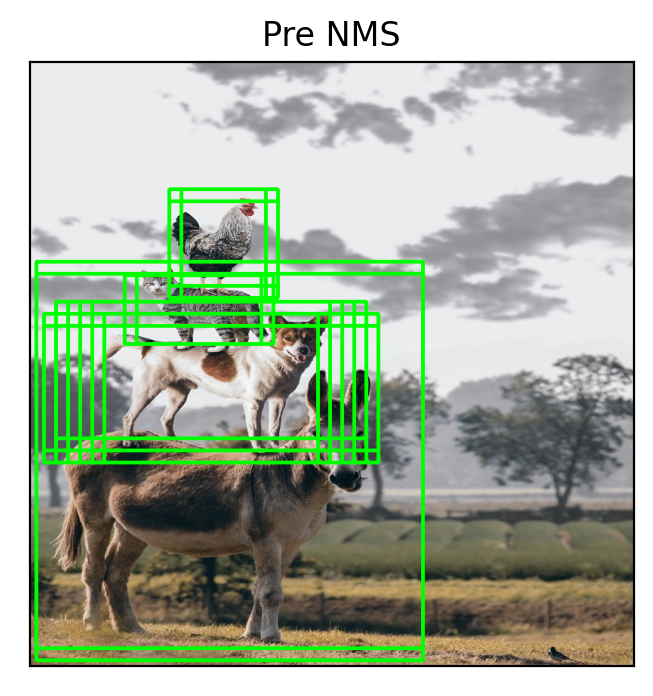

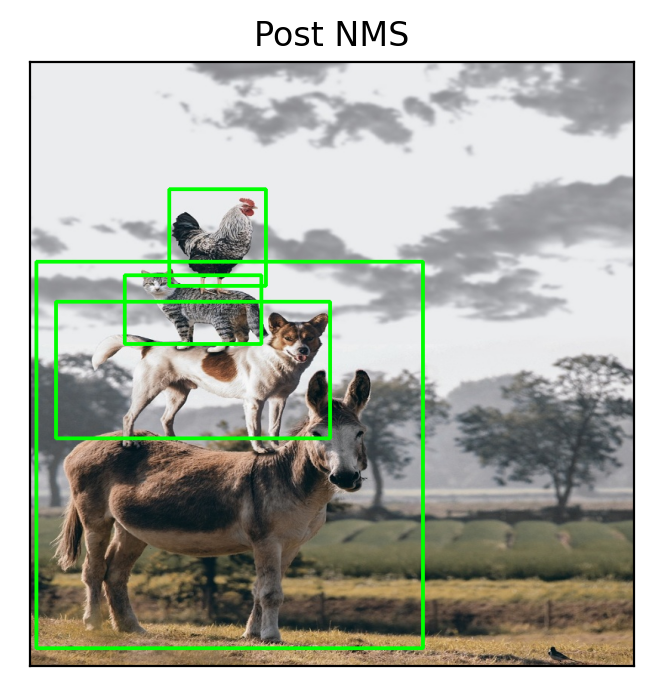

In [30]:
# Let us look at how NMS works with an illustrative example

# Let us use the positive anchors
pre_nms_bboxes = positive_anchor_bboxes
print(f"Pre NMS {pre_nms_bboxes.shape[0]} boxes")
# Let us assume all confidences are 1
scores = torch.ones((positive_anchor_bboxes.shape[0]))


img_clone = img.copy()
for bbox in pre_nms_bboxes:
    xtl, ytl, xbr, ybr = bbox
    cv2.rectangle(img_clone, (int(xtl), int(ytl)),  (int(xbr), int(ybr)), (0, 255,0), 3)

plot_img(img_clone, "Pre NMS")

#  torchvision.ops.nms performs NMS and returns the indices of boxes which are retained after NMS
post_nms_indices = torchvision.ops.nms(pre_nms_bboxes, scores, 0.5)
post_nms_boxes = pre_nms_bboxes[post_nms_indices]
print(f"Post NMS {post_nms_boxes.shape[0]} boxes")

img_clone = img.copy()
for bbox in post_nms_boxes:
    xtl, ytl, xbr, ybr = bbox
    cv2.rectangle(img_clone, (int(xtl), int(ytl)),  (int(xbr), int(ybr)), (0, 255,0), 3)

plot_img(img_clone, "Post NMS")

In [31]:
n_train_post_nms = 2000
n_val_post_nms = 300
nms_threshold = 0.7

post_nms_indices = torchvision.ops.nms(rois, objectness_scores, nms_threshold)


post_nms_rois = rois[post_nms_indices[:n_train_post_nms]]

## Fast R-CNN

We briefly discussed the idea behind R-CNN earlier. Let us now revisit it in greater detail. We are given a set of RoIs (some of which contain the object). And our task is train an object detector that is capable of localizing the objects.

To do this, we will need to extract the features corresponding to each RoI and pass it through a neural network (classifier and regressor) that learns to predict the class and the regression targets.

R-CNN solved this in the naive way i.e it extracted the RoI one at a time, warped it to make it fixed size, and pass it through a deep CNN to extract the features corresponding to the ROI. This meant each RoI required a separate forward pass, making the approach very slow.

The question, as always, is can we do better? 

Let us consider the convolutional backbone. It processes the whole image with several convolutional (conv) and max pooling layers to produce a conv feature map. We have also seen how there is a subsampling factor of 16 i.e a 16x16 pixels in the input image get reduced to a single point in the feature map. Also, remember that the embedding at every grid point on the feature map is the representation/digest of a region in the input image. 

**Key Idea 1**: The features corresponding to each RoI are already present in the conv feature map and we can extract them via the feature map.

For example: Let us say our RoI is  (0, 0, 256, 256). We know that the (0, 0, 256, 256) region in the input image is represented by (0, 0, 256/16, 256/16) i.e (0, 0, 16, 16) region in the conv feature map. Since the embedding for point in the conv feature map is a digest of the receptive field, we can use these features directly as the features of the RoI. So to obtain the features for an RoI of (0, 0, 256, 256), we just take all the embeddings corresponding to the region (0, 0, 16, 16) in the conv feature map.

Since we are performing this feature extraction directly on the convolutional feature map, which is obtained for the entire image, we can obtain the RoI features for all the RoIs in just a single forward pass. This eliminates the need for multiple forward passes.

**Key Idea 2**: RoI pooling

We discussed a clever way of extracting the features corresponding to each RoI. And we want to use these features in order to train our classifier and regressor. 

However there is a problem. As we know, RoIs are of different sizes. And different sized RoIs will lead to different feature embedding sizes.

For example:
    If our RoI is (0, 0, 256, 256), our RoI feature embeddings will be (16, 16, 512), i.e all the embeddings (of size 512) in the (0, 0, 16, 16) region of the conv feature map.
    If our RoI is (0, 0, 128, 128), then our RoI feature embeddings will be (8, 8, 512), i.e all the embeddings in the (0, 0, 8, 8) region of the conv feature map.
    
    
And we know that neural networks typically need the same sized input. So how do we deal with input embeddings of different sizes? The answer is **RoI Pooling**. 

We know that neural networks need the same sized input. Therefore, let us fix the size of the input ROI feature map that goes into neural network. Now our task is to reduce variable sized RoI feature maps to a fixed size. 

So if the fixed feature map size is set to be $H, W$, and our RoI corresponds to  $(r, c, h, w)$ in the conv feature map , we then simply divide $h$ and $w$ into equal sized blocks of size $h/H$ and $w/W$ respectively, and apply Max Pooling on these blocks to obtain a $H, W$ feature map.

Going back to our example, let us fix $H$ = $W$ = 4. So our expected fixed feature map size is $(4, 4, 512)$

So when our RoI is (0, 0, 256, 256), our RoI feature embeddings will be (16, 16, 512). i.e $h$=$w$=16. We divide the 16x16 region into 4 ($16/4$, $16/4$) regions, and perform max pooling on each of these regions to obtain a fixed size $(4, 4, 512)$ feature.

Similarly when our RoI is (0, 0, 128, 128), $h$=$w$=8. And we divide the 8x8 region into 4 ($8/4$, $8/4$) regions, and perform max pooling to obtain the fixed size $(4, 4, 512)$ feature.

The astute reader will notice that we have carefully chosen our RoIs so that they are multiples of $H$ and $W$, resulting in integer values for $h/H$ and $w/W$ respectively. But in reality, this rarely happens. $h/H$ and $w/W$ are often floating point numbers. What do we do in this case? The answer is quantization i.e we choose the nearest integer closest to $h/H$ and $w/W$ respectively (floor operation in the original implementation). This has been improved upon by RoIAlign, which uses bilinear interpolation instead of quantization. But we will not get into the details of RoIAlign here.

In effect, if we have a large RoI, we divide the feature map into a fixed number of large regions and perform max pooling. And when we have a small RoI, we divide the feature map into a fixed number of small regions and perform max pooling. The size of the region used for pooling can change, but the output size remains fixed.

Note that the dimension of the RoI pooling output doesn’t actually depend on the size of the input feature map nor on the size of the RoIs. It’s determined solely by the number of sections we divide the RoI into i.e $H$ and $W$


Thus, the purpose of RoI pooling is to perform max pooling on inputs of non-uniform sizes to obtain fixed-size feature maps. Fast R-CNN and Faster R-CNN both use 7x7 as the fixed feature map size.

### Fast R-CNN architecture

Given the conv feature map, and a set of RoIs, we have seen how the region of interest (RoI) pooling layer extracts a fixed-length feature vector from the feature map.

Each feature vector is fed into a sequence of Fully Connected (FC) layers that finally branch into two sibling output layers:
```
Classifier:  Produces softmax probability estimates over K object classes plus a catch-all “background” class 
Regressor:  Produces four real-valued numbers for each of the K object classes.
```

In [32]:
class Fast_RCNN_ROI_Head(nn.Module):
    def __init__(self, num_classes, H, W, subsample=16, embedding_size=512):
        super(Fast_RCNN_ROI_Head, self).__init__()
        
        self.num_classes = num_classes
        self.H = H
        self.W = W
        self.embedding_size = embedding_size
        self.subsample = 16
        
        self.roi_head_classifier = nn.Sequential(
            nn.Linear(H*W*embedding_size, 4096),
            nn.ReLU(True),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
        )
        self.cls = torch.nn.Linear(4096, num_classes+1) #num_classes + background
        self.reg = torch.nn.Linear(4096, (num_classes+1)*4)
        
        
    def forward(self, x, rois):
        """
        Input:
        x : (1, c, h, w) tensor representing the conv feature map
        rois: (n, 4) tensor representing bounding boxes of RoIs
        
        Output:
        roi_cls_scores: (n, num_classes+1) tensor representing classification scores for each RoI
        roi_loc: (n, (num_classes+1)*4) tensor representing the regression scores for each RoI
        """
        assert x.shape[0] == 1 # This code only supports batch size of 1
        roi_pooled_features = torchvision.ops.roi_pool(x, [rois], 
                                                       output_size=(self.H, self.W), 
                                                       spatial_scale=1/subsample)
        roi_pooled_features = roi_pooled_features.view(-1, self.H*self.W*self.embedding_size)
        fc_out = self.roi_head_classifier(roi_pooled_features)
        roi_cls_scores = self.cls(fc_out)
        roi_loc = self.reg(fc_out)
        return roi_cls_scores, roi_loc

In [33]:
img_size = (1, 3, 800, 800)

x = torch.rand(img_size)
conv_feature_map = frcnn_fe(x)

frcnn_roi_head = Fast_RCNN_ROI_Head(num_classes=4, H=7, W=7)
num_rois = 128
roi_cls_scores, roi_loc = frcnn_roi_head(conv_feature_map, rois[:num_rois])

# Classification score for every single ROI
assert roi_cls_scores.shape == torch.Size([num_rois, 5])

# Bounding box offsets for every ROI
assert roi_loc.shape == torch.Size([num_rois, 5*4])

### Generating  ground truth for Fast R-CNN

For every image, we have a list of RoIs generated by the RPN, and a list of ground truth bounding boxes. How do we generate the ground truth and regression targets for each RoI?

The idea remains the same as our RPN. We use Intersection over Union (IoU) scores. 

In particular:
1. We compute the IoU between all RoIs and ground truth boxes. 
2. For each RoI, we determine the GT bounding box with the highest IoU. 
3. If the highest IoU is greater than a threshold (0.5), then we assign the corresponding GT label as the label for the RoI.
4. If the IoU is between [0.1, 0.5], then we assign background label. Using a lower bound of 0.1 ensures that certain RoIs that have small intersection with the ground truth are selected as background. This is helpful as it chooses hard examples for background. This is a form of hard negative mining.

In [34]:
# Since we haven't trained the RPN, the RoIs generated from the RPN will be bad
# So let us add the RoIs corresponding to positive anchors for better illustraction

post_nms_rois = torch.cat([post_nms_rois, positive_anchor_bboxes]) # Note that this is a hack done for better illustration

In [35]:
# We will compute the IoU between the ground truth bounding boxes and the anchors
ious = torchvision.ops.box_iou(gt_bboxes, post_nms_rois)

# Highest IoU for every ROI box
roi_ious_argmax = torch.argmax(ious, dim=0)
roi_ious = ious[roi_ious_argmax]

gt_label_with_max_iou = gt_labels[roi_ious_argmax]

# Defin the thresholds for positive and negative
pos_threshold = 0.5
neg_low_threshold = 0.1
neg_high_threshold = 0.5

pos_idxes = torch.where(ious > pos_threshold)[0]
neg_idxes = torch.where((ious > neg_low_threshold) & (ious < neg_high_threshold))[0]

In [36]:
print(f"Number of object RoIs {len(pos_idxes)}")
print(f"Number of background RoIs {len(neg_idxes)}")

Number of object RoIs 30
Number of background RoIs 471


### Training the Fast R-CNN module

The RPN generates ~2000 RoIs per image. Due to computational constraints we cannot use all the N RoIs. Instead, we only sample a subset of them. The training minibatches are sampled hierarchically, first by sampling K images and then by sampling R/K RoIs from each image.  R is set to 128 in FRCNN. For this discussion, we assume that N = 1, i.e. we have 1 single image per mini-batch

So, given the RoIs for a single image, how do we sample 128 RoIs from it?

A simple solution is to randomly sample 128 RoIs. However, this runs into the same data imbalance issue that we discussed earlier i.e we will end up sampling backgrounds a lot more frequently than the classes.

In order to solve this problem, we adapt a similar sampling strategy as before. In particular, for a single image, we randomly sample 128 RoIs. In these 128 RoIs we ensure the sampled background: object RoIs have a ratio of 0.75:0.25.   If there are fewer than 32 RoIs containing the objects, we pad the mini-batch with more background RoIs.

In [37]:
pos_ratio = 0.25
n_samples = 128

n_pos = int(pos_ratio * n_samples)

if len(pos_idxes) > n_pos:
    # Let us undersample pos_idxes
    pos_idxes = pos_idxes[torch.randperm(len(pos_idxes))[:n_pos]]

    
# Number of negatives = 96 + (padding in case there are < 128 positive examples)
n_neg = int(n_samples * (1-pos_ratio) + n_pos - len(pos_idxes))

if len(neg_idxes) > n_neg:
    neg_idxes = neg_idxes[torch.randperm(len(neg_idxes))[:n_neg]]
    
    
# Get RoIs that overlap heavily with GT bboxes (with IoU > 0.5) 
pos_rois = post_nms_rois[pos_idxes]
pos_labels = gt_label_with_max_iou[pos_idxes]

neg_rois = post_nms_rois[neg_idxes]
neg_labels = torch.zeros((neg_rois.shape[0],)) # 0 is background class


train_rois = torch.cat([pos_rois, neg_rois])
roi_labels = torch.cat([pos_labels, neg_labels]).long()

assert train_rois.shape == torch.Size((n_samples, 4))
assert roi_labels.shape == torch.Size((n_samples,))

#### Assigning targets to RoI boxes

We have seen how to sample the RoI boxes for training and how to assign labels for each of the RoIs. Now we need to assign the regression targets. 

There are 2 cases to consider
1. Case 1: label = 0: For the background class, the regression targets are not used / applicable
2. Case 2: label != 0: These RoIs contain an object. We need to generate regression targets for these anchors.


We adopt the same strategy as we did in the RPN for the positive RoIs.

Let us now consider only the case of positive anchors. The key intuition here is that **the anchors already contain majority of the object**. Otherwise they wouldn't have become positive anchors. So there is already significant overlap between the anchor and the object in question. Therefore it makes sense for us to learn the offset from the anchor bounding box to the object bounding box. The regressor is tasked with learning this offset i.e what delta we must make to the anchor bounding box in order for it to become the object bounding box. 

$$t_{x} = (x - x_{roi})/w_{roi}$$
$$t_{y} = (y - y_{roi})/h_{roi}$$
$$t_{w} = log(w/ w_{roi})$$
$$t_{h} = log(h/ h_{roi})$$

where $x$, $y$, $w$, and $h$ denote the ground truth bounding box’s center coordinates and its width and height
and $x_{roi}$, $y_{roi}$, $w_{roi}$, and $h_{roi}$ denote the RoI bounding box’s center coordinates and its width and height


$t_x$, $t_y$, $t_w$ and $t_h$ are the regression targets. So the regressor is in effect learning to predict the delta between the anchor bounding box and the ground truth bounding box.

In [38]:
# We will use the exact same function that we used for RPN as it is the exact same formulation
rcnn_loc_targets = get_regression_targets(train_rois, gt_bboxes[roi_labels-1])

assert rcnn_loc_targets.shape == train_rois.shape

### Fast R-CNN Loss Function

We have defined the Fast R-CNN  network and also how we can generate labels and regression targets for the outputs of the Fast R-CNN. Now we need to study the loss function that enables us to train Fast R-CNN.

As one would naturally expect, there are 2 loss terms
1. Classification Loss:  We will use the standard cross entropy loss that is used in any standard classifier.

2. Regression Loss: The regression loss applies **only** to the object RoIs i.e background RoIs do not contribute to regression. Here we use smooth L1 loss as we did in RPN.


Thus overall loss for a single RoI can be defined as follows:

$$L_{cls} = CrossEntropy(p, u)$$

$$L_{reg} = L_{1;smooth}(t^{u} , v)$$ 

$$L_{RCNN} =  L_{cls} + \lambda[u>0]L_{reg}$$


where 
$p$ is the predicted label for the RoI.
$u$ is the true label for the RoI.
$t^{u}$ = $(t_x, t_y, t_w, t_h)$ are the regression predictions for class $u$
$v$ = $(v_x, v_y, v_w, v_h)$ are the regression targets


Thus overall loss can be defined as follows:

$$L_{cls} = \frac{\sum_{i}CrossEntropy(p_i, p_i^{*})} { N_{roi}} $$ 

$$L_{reg} = \frac{\sum_{\{\forall i | p_i^{*}!=0\}} L_{1;smooth}(t_i , t_i^{*})}{N_{pos}} $$ 

$$L_{RCNN} =  L_{cls} + \lambda L_{reg}$$

where 

$p_i$ is the is the prediction probabilities for the RoI $i$. 

$p_i^{*}$ is the true label for RoI $i$. 

$t_i$ = $(t_{x}, t_y, t_w, t_h)$ are the regression predictions for RoI $i$ corresponding to class $p_i^{*}$

$t_i^{*}$ = $(t_x^{*}, t_y^{*}, t_w^{*}, t_h^{*})$ are the regression targets for RoI $i$

$N_{roi}$ is the number of RoIs.

$N_{pos}$ is the number of object RoIs i.e non background RoIs.

In [39]:
def rcnn_loss(roi_cls_scores, roi_loc, roi_labels, rcnn_loc_targets, lambda_ = 1):
    """
    Implements the RCNN Loss function
    
    Input: 
    roi_cls_scores: (128, num_classes) tensor representing RCNN classifier scores for each RoI
    roi_loc: (128, num_classes*4) tensor representing RCNN regressor predictions for each class for every RoI
    roi_labels: (128) representing the true class for each RoI
    rcnn_loc_targets: (128, 4) tensor representing RoI regressor targets for each RoI
    
    """
    classification_criterion = nn.CrossEntropyLoss()
    reg_criterion = nn.SmoothL1Loss(reduction="sum")
    
    cls_loss = classification_criterion(roi_cls_scores, roi_labels)
    
    pos_roi_idxes = torch.where(roi_labels>0)[0] # Find the positive RoIs
    pred_all_offsets = roi_loc[pos_roi_idxes] 
    
    num_pos_rois = len(pos_roi_idxes)
    pred_all_offsets = pred_all_offsets.view(num_pos_rois, -1, 4) # (n, num_classes*4) to (n, num_classes, 4)
    pred_cls_offsets = pred_all_offsets[torch.arange(num_pos_rois) , roi_labels[pos_roi_idxes]]
    
    gt_offsets = rcnn_loc_targets[pos_roi_idxes]
    
    reg_loss = reg_criterion(pred_cls_offsets, gt_offsets) / num_pos_rois
    return {
        "rcnn_cls_loss": cls_loss,
        "rcnn_reg_loss": reg_loss,
        "rcnn_total_loss": cls_loss + lambda_* reg_loss
        
    }

In [40]:
rpn_cls_scores = rpn_cls_scores.squeeze(0) #squeeze(0) to get rid of batch size dimension
rpn_loc = rpn_loc.squeeze(0)

rcnn_loss_dict =  rcnn_loss(roi_cls_scores, roi_loc, roi_labels, rcnn_loc_targets)
print(rcnn_loss_dict)

{'rcnn_cls_loss': tensor(1.6033, grad_fn=<NllLossBackward>), 'rcnn_reg_loss': tensor(5.0592, grad_fn=<DivBackward0>), 'rcnn_total_loss': tensor(6.6625, grad_fn=<AddBackward0>)}


#### Fast R-CNN Inference

We have looked at how to train Fast R-CNN module. Once the model is trained, the next question is how do we use the model to generate output classes and bounding boxes?

The Fast R-CNN model outputs a classification score and regression offsets for every RoI. We can safely ignore the background RoIs. For the rest of the RoIs, the class with the highest probability is chosen as the output label. And the offsets corrsesponding to that class are chosen. We apply similar post processing steps to that of RPN:
1. We translate the offsets back to (xtl, ytl, xbr, ybr) format using the RoI.
2. We will clip the output bounding box to within the image boundaries
 
We face a similar problem as before. It is very likely that there are multiple bounding boxes corresponding to the same object present in the output. We deal with it in the same way as earlier i.e using **Non Maximal Suppression (NMS)**. There is one difference however. 

In case of RPN, we applied a global NMS across all bounding boxes predicted by the RPN.
Here, NMS is applied only across the bounding boxes belonging to the same class. This is done for all classes. This should intuitively make sense. There is no point in suppressing highly overlapping bounding boxes if the bounding boxes are representing different classes. 

In [41]:
def fast_rcnn_inference(frcnn_roi_head, rois, conv_feature_map,
                       nms_threshold=0.7):
    """
    Inference method for Fast R-CNN module
    
    frcnn_roi_head: trained instance of Fast_RCNN_ROI_Head
    rois: RoIs to inference
    conv_feature_map: (n, c, h, w) convolutional feature map tensor
    
    """
    frcnn_roi_head.eval()
    roi_cls_scores, roi_loc = frcnn_roi_head(conv_feature_map, rois)
    
    
    # The predicted class is the class with the highest score
    output_labels = torch.argmax(roi_cls_scores, dim=1)
    
    # The predicted probabilities is obtained via softmax. And the highest
    # probability is chosen as the probability score for this prediction
    output_probs = nn.functional.softmax(roi_cls_scores, dim=1)[torch.arange(rois.shape[0]), output_labels]
    
    # Convert locs from (n, num_classes*4) to (n, num_classes, 4)
    output_offsets = roi_loc.view(rois.shape[0], -1, 4)
    
    # Select offsets corresponding to the predicted label
    output_offsets = output_offsets[torch.arange(rois.shape[0]), output_labels]
    
    # Assert we have outputs for each RoI
    assert output_offsets.shape == torch.Size([rois.shape[0], 4])
    
    # Convert offsets to (xtl, ytl, xbr, ybr)
    output_bboxes = generate_bboxes_from_offset(output_offsets, rois)
    
    # Clip the bounding boxes to within images
    assert height==width
    rois = output_bboxes.clamp(min=0, max=width)
    
    post_nms_labels, post_nms_probs, post_nms_boxes = [], [], []
    
    for cls in range(1, frcnn_roi_head.num_classes+1): # 0 is background, thus ignored
        # Perform NMS for each class
        cls_idxes = torch.where(output_labels == cls)[0]
        cls_labels = output_labels[cls_idxes]
        cls_bboxes = output_bboxes[cls_idxes]
        cls_probs = output_probs[cls_idxes]
        keep_indices = torchvision.ops.nms(cls_bboxes, cls_probs, nms_threshold)
        
        post_nms_labels.append(cls_labels[keep_indices])
        post_nms_probs.append(cls_probs[keep_indices])
        post_nms_boxes.append(cls_bboxes[keep_indices])
        
    return {
        "labels": torch.cat(post_nms_labels),
        "probs": torch.cat(post_nms_probs),
        "bboxes": torch.cat(post_nms_boxes)
    }

In [42]:
conv_feature_map = torch.rand([1, 512, 50, 50])
predictions = fast_rcnn_inference(frcnn_roi_head, rois=positive_anchor_bboxes, 
                                  conv_feature_map=conv_feature_map, nms_threshold=0.7)

#### Training Faster R-CNN

As we have seen so far, FRCNN consists of 2 sub-networks
1. Region Proposal Network (RPN): which is responsible for generating good region proposals that contain objects
2. Fast R-CNN: which is responsible for the object classification and detection from a list of RoIs.

Thus FRCNN is a 2 stage object detector. We have one stage that generates good region proposals. And another that takes the region proposals and detects objects in the image.

So how do we train FRCNN?

A simple idea would be to train two independent networks (RPN, and Fast R-CNN). However we do not want to do this because it is expensive. Additionally if we do so, each network will modify the convolutional layers in their own way. 

As discussed earlier, we want to share the convolutional layers across RPN and the Fast R-CNN modules. This ensures efficiency (only one conv backbone as opposed to two independent backbones). Additionally, both the RPN and F-RCNN are performing similar tasks. So it intuitively makes sense to share the same set of convolutional features.


We therefore need to develop a technique that allows for sharing convolutional layers between the two networks, rather than learning two separate networks.


The paper discussed two techniques for doing so:

1. **Alternate Optimization (AltOpt)**: In this solution, we first train RPN, and use the proposals to train Fast R-CNN. The network tuned by Fast R-CNN is then used to initialize RPN, and this process is iterated.  This involves multiple rounds of training alternating between training RPN and training Fast R-CNN. 



2. **Approximate joint training**: In this solution, the RPN and Fast R-CNN networks are merged into one network during training In each SGD iteration, the forward pass generates region proposals which are treated just like fixed, pre-computed proposals when training a Fast R-CNN detector. We combine both the RPN and the Fast R-CNN losses and perform backprop as usual. This training is significantly faster as we are training both the networks together end to end. However the optimization is approximate because we treat the RPN generated proposals as fixed, whereas in reality they are a function of the RPN. So, we'd be ignoring one derivative.


Both the techniques give similar accuracy. So joint training, which is significantly faster, is preferred.